## Laboratorium 3 - algorytm *k* Najbliższych Sąsiadów (*k*NN)


### Opis
Celem laboratorium jest implementacja klasyfikatora *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) oraz zapoznanie się z innymi metrykami klasyfikacji.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana bez wykorzystania zewnętrznych bibliotek.


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator *k* najbliższych sąsiadów (*k*NN)** i uruchom predykcję.
* Opisz jak zmieniają się wyniki klasyfikatora dla różnych wartości *k*, dla różnej liczby klas oraz dla różnej liczby cech.
* Wyświetl tablicę pomyłek (*confusion matrix*). W tym przypadku możesz zastosować gotową implementację z biblioteki `scikit-learn` <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>.
* Odszukaj przynajmniej dwie inne (niż accuracy) metryki przytatne w klasyfikacji na stronie <https://scikit-learn.org/stable/modules/model_evaluation.html> i opisz ich wyniki. Wytłumacz czym się różnią i co można z nich odczytać.
* Opisz różnicę wyników klasyfikacji obu algorytmów (NN i *k*NN)?


> UWAGA: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.

### PONIŻEJ WYKONAJ ZADANIE

In [350]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

all_data = pd.DataFrame(np.vstack((train, test)))
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,36.0,1.0,0.39093,1.1025,0.73351,0.72022,0.69474,0.17954,0.076072,1.053200,0.059213,0.157470,0.024197,0.009541,0.000247,1.20420
1,5.0,4.0,0.93671,2.4151,0.72980,0.81793,0.86491,0.33439,0.080539,1.180500,0.048722,0.120510,0.014314,0.003998,0.000372,1.30830
2,29.0,1.0,0.83750,1.9512,0.49050,0.96800,0.98246,0.65138,0.016224,0.047908,0.005119,0.035621,0.001267,0.000322,0.000011,0.23514
3,35.0,3.0,0.90755,2.5820,0.62394,0.96837,0.99825,0.55674,0.031714,0.183050,0.079387,0.162130,0.025613,0.007412,0.000699,1.69510
4,32.0,7.0,0.88485,2.2398,0.55754,0.97997,0.99825,0.67974,0.009129,0.015166,0.025658,0.087206,0.007548,0.002152,0.000179,0.75154


In [351]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name != 0:
            if df[feature_name].dtype == 'float64' or df[feature_name].dtype == 'int32':
                max_value = df[feature_name].max()
                min_value = df[feature_name].min()
                result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


train = normalize(pd.DataFrame(train))
test = normalize(pd.DataFrame(test))

columns = ["class"]
for i in range(1, 16):
    columns.append('feature_' +str (i))

train.columns = columns
test.columns = columns

all_data.columns = columns

# train = pd.DataFrame(train)
# test = pd.DataFrame(test)
train

,class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,36.0,0.000000,0.325831,0.024266,0.703508,0.454962,0.495454,0.186267,0.385109,0.153731,0.305450,0.512751,0.332917,0.379755,0.097674,0.422129
1,5.0,0.230769,0.842476,0.095004,0.699710,0.587664,0.687900,0.356208,0.407041,0.171017,0.252791,0.379455,0.204207,0.172717,0.138704,0.459842
2,29.0,0.000000,0.748562,0.070003,0.454741,0.791479,0.820838,0.704091,0.091261,0.017223,0.033927,0.073304,0.034294,0.035405,0.020092,0.071054
3,35.0,0.153846,0.814872,0.103998,0.591342,0.791981,0.838695,0.600227,0.167316,0.035574,0.406714,0.529557,0.351359,0.300249,0.246043,0.599974
4,32.0,0.461538,0.793384,0.085556,0.523369,0.807735,0.838695,0.735215,0.056424,0.012777,0.137020,0.259345,0.116085,0.103741,0.075136,0.258137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,31.0,0.153846,0.888591,0.631373,0.940717,0.566912,0.813351,0.036798,0.977847,0.999337,0.075008,0.072099,0.046594,0.038122,0.044660,0.100357
2240,29.0,0.384615,0.649516,0.083071,0.414323,0.693427,0.747146,0.709980,0.159751,0.030691,0.072038,0.120475,0.020127,0.041457,0.010220,0.117377
2241,12.0,0.538462,0.876392,0.103914,0.571506,0.758792,0.758740,0.441793,0.145231,0.046227,0.477821,0.554340,0.434899,0.401871,0.169536,0.805418
2242,28.0,0.769231,0.779316,0.094852,0.438814,0.691993,0.995541,0.783562,0.030697,0.015465,0.578124,0.701170,0.540490,0.429988,0.371596,0.805269


array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>],
       [<AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>,
        <AxesSubplot:title={'center':'feature_7'}>],
       [<AxesSubplot:title={'center':'feature_8'}>,
        <AxesSubplot:title={'center':'feature_9'}>,
        <AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_11'}>],
       [<AxesSubplot:title={'center':'feature_12'}>,
        <AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>]], dtype=object)

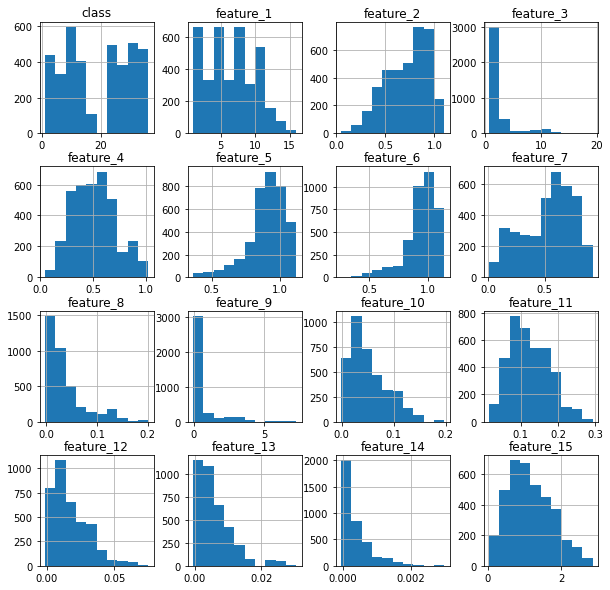

In [352]:
all_data.hist(figsize=(10, 10))

In [353]:
max_k = 3

klasy = train['class'].unique()
print(np.sort(klasy[:4]))

cechy = columns
if 'class' in cechy:
    cechy .remove('class')
print(cechy)

[ 5. 29. 35. 36.]
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']


In [354]:
def normalize(df, exclude):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name not in exclude:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


all_data = normalize(all_data, ['class'])

train = normalize(train, ['class'])
test = normalize(test, ['class'])
# all_data2['class'] = all_data['class']

# Implementacja klasyfikatora kNN

In [355]:
def edist(p1, p2, features):
    ans = 0
    for idx, feature in enumerate(features):
        # print(p1[feature], p2[feature])
        ans += ((p1[feature] - p2[feature]) ** 2)
    ans = ans ** (1/2)
    return ans


def most_common(distances: list, k_nearest: int):
    distances = distances[:k_nearest]
    class_list = []

    for x in distances:
        class_list.append(x[1])

    return max(set(class_list), key=class_list.count)


def predict(df_train: pd.DataFrame, df_test, features_list, k_neighbours):
    predictions = []
    for i in df_test.index:
        points = []
        for j in df_train.index:
            test_row = df_test.iloc[i]
            train_row = df_train.iloc[j]
            current = (edist(test_row, train_row, features_list), train_row['class'])
            # print(test_row)
            # print(train_row)
            # # print(current)
            points.append(current)
        points = sorted(points, key=lambda x: x[0])
        predicted_class = most_common(points, k_neighbours) # xxx = k
        predictions.append(predicted_class)
    return np.array(predictions)

In [356]:
def plot2d(train_df, class1, class2, feature1, feature2, test_df=None):
    feature1 = 'feature_' + str(feature1)
    feature2 = 'feature_' + str(feature2)

    plt.figure(figsize=(10, 10))

    t1 = train_df[train_df['class'] == class1]
    t2 = train_df[train_df['class'] == class2]

    plt.scatter(t1[feature1], t1[feature2], c='blue')
    plt.scatter(t2[feature1], t2[feature2], c='orange')

    if test_df is not None:
        p1 = test_df[test_df['observed'] == class1]
        p2 = test_df[test_df['observed'] == class2]

        plt.scatter(p1[feature1], p1[feature2], c='blue', marker='x')
        plt.scatter(p2[feature1], p2[feature2], c='orange', marker='x')

In [357]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score

def show_statistics(true, pred):
    cm = confusion_matrix(true, pred)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot(cmap='binary')
    print('Accuracy:', accuracy_score(true, pred))
    bac = balanced_accuracy_score(true, pred)
    print('Balanced accuracy:', bac)
    f1s = f1_score(true, pred, average='micro')
    print('F1 score:', f1s)

    return bac, f1s


In [358]:
def evaluate_model(classes, features, k):
    wybrane_klasy = classes
    wybrane_cechy = features

    train_filtered = train[train['class'].isin(wybrane_klasy)]
    test_filtered = test[test['class'].isin(wybrane_klasy)]

    train_filtered = train_filtered.reset_index()
    test_filtered = test_filtered.reset_index()

    prediction = predict(train_filtered, test_filtered, wybrane_cechy, k)

    predicted_test = test_filtered
    predicted_test['observed'] = prediction

    if len(classes) == 2 and len(features) == 2:
        plot2d(train_filtered, classes[0], classes[1], features[0], features[1], predicted_test)

    return show_statistics(predicted_test['class'], predicted_test['observed'])


In [359]:
models = []

Accuracy: 0.9545454545454546
Balanced accuracy: 0.9545454545454546
F1 score: 0.9545454545454546
Accuracy: 0.9636363636363636
Balanced accuracy: 0.9636363636363636
F1 score: 0.9636363636363636
Accuracy: 0.9818181818181818
Balanced accuracy: 0.9818181818181818
F1 score: 0.9818181818181818
Accuracy: 0.990909090909091
Balanced accuracy: 0.990909090909091
F1 score: 0.990909090909091


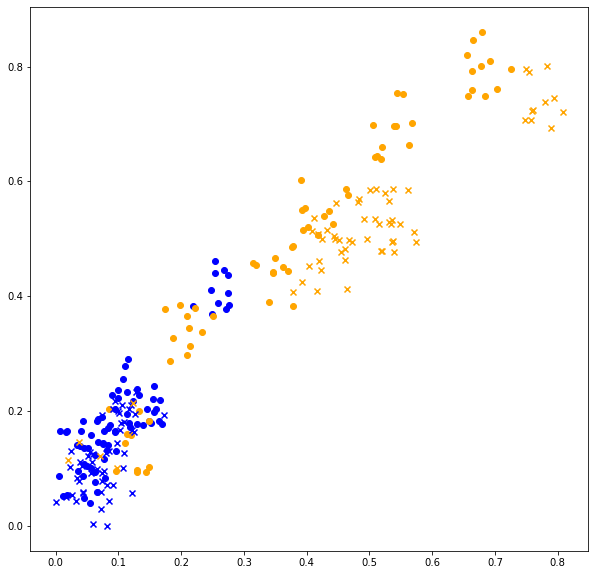

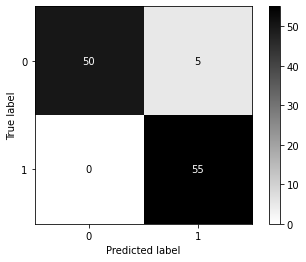

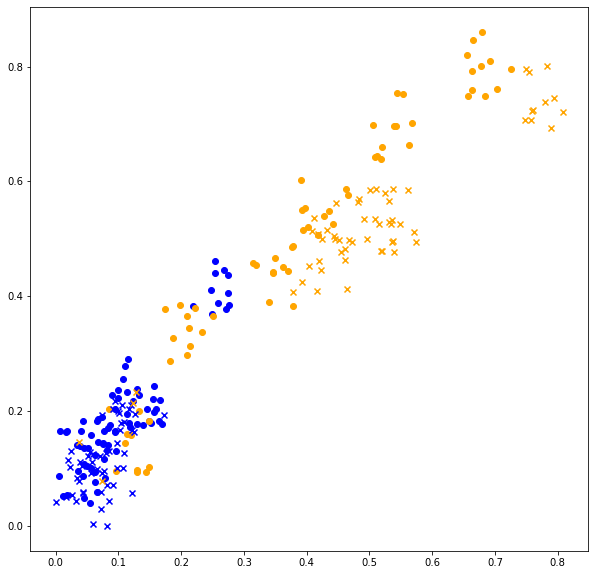

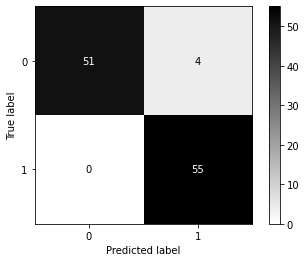

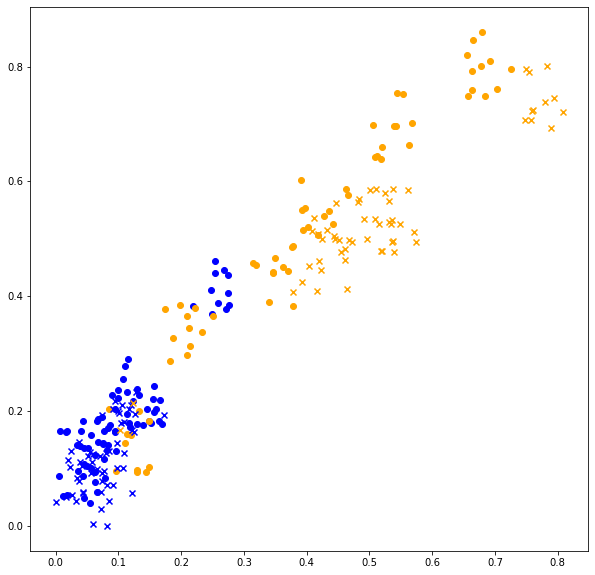

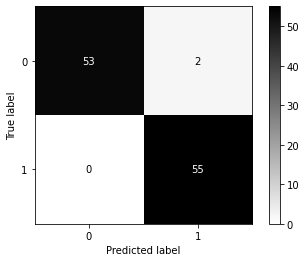

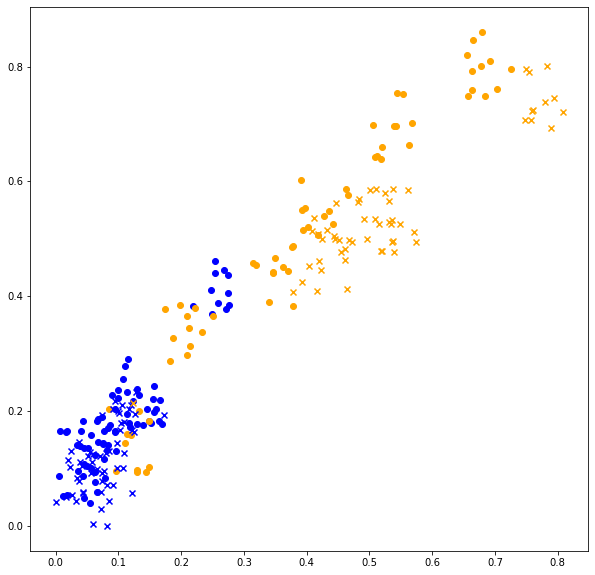

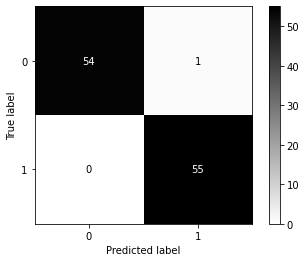

In [360]:
for i in range(1, 8, 2):

    klasy = [1, 33]
    featury = [10, 15]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.9636363636363636
Balanced accuracy: 0.9636363636363636
F1 score: 0.9636363636363636
Accuracy: 0.9818181818181818
Balanced accuracy: 0.9818181818181818
F1 score: 0.9818181818181818
Accuracy: 0.9818181818181818
Balanced accuracy: 0.9818181818181818
F1 score: 0.9818181818181818
Accuracy: 0.9818181818181818
Balanced accuracy: 0.9818181818181818
F1 score: 0.9818181818181818


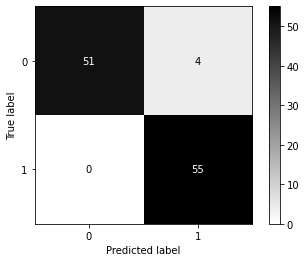

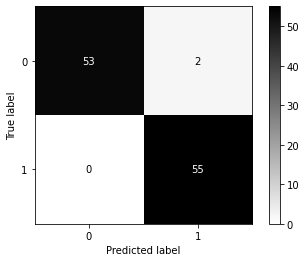

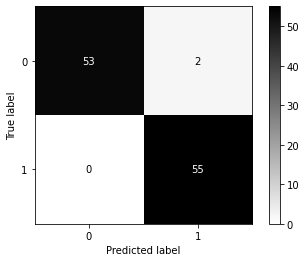

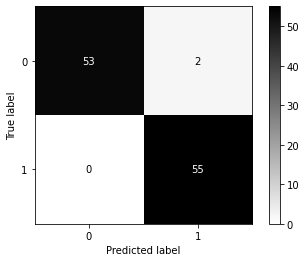

In [361]:
for i in range(1, 8, 2):

    klasy = [1, 33]
    featury = [10, 15, 4, 6]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.9727272727272728
Balanced accuracy: 0.9727272727272727
F1 score: 0.9727272727272728
Accuracy: 0.9727272727272728
Balanced accuracy: 0.9727272727272727
F1 score: 0.9727272727272728
Accuracy: 0.9727272727272728
Balanced accuracy: 0.9727272727272727
F1 score: 0.9727272727272728
Accuracy: 0.9727272727272728
Balanced accuracy: 0.9727272727272727
F1 score: 0.9727272727272728


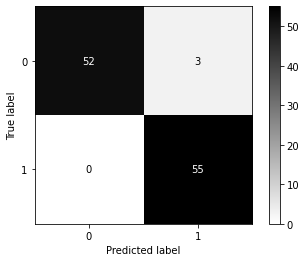

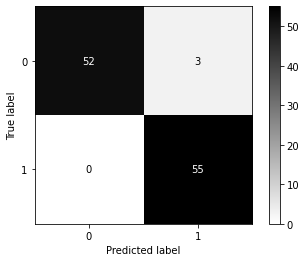

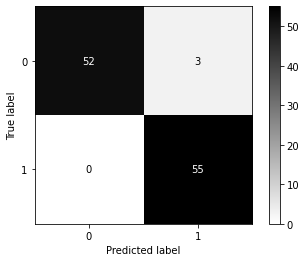

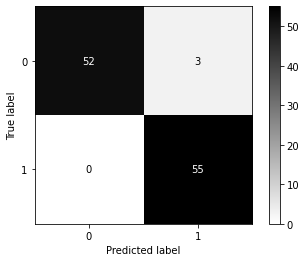

In [362]:
for i in range(1, 8, 2):

    klasy = [1, 33]
    featury = [10, 15, 4, 6, 8, 11, 12, 13]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.8803827751196173
Balanced accuracy: 0.8863636363636364
F1 score: 0.8803827751196173
Accuracy: 0.8947368421052632
Balanced accuracy: 0.9
F1 score: 0.8947368421052632
Accuracy: 0.9043062200956937
Balanced accuracy: 0.9090909090909091
F1 score: 0.9043062200956937
Accuracy: 0.8947368421052632
Balanced accuracy: 0.9
F1 score: 0.8947368421052632


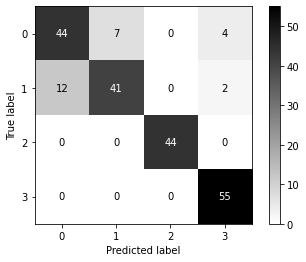

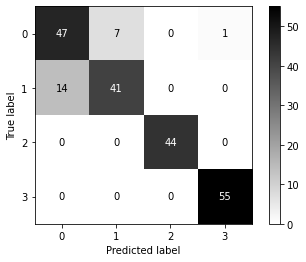

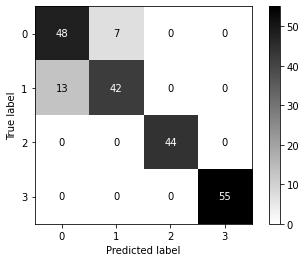

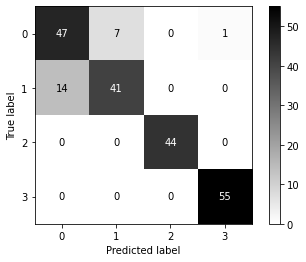

In [363]:
for i in range(1, 8, 2):

    klasy = [1, 33, 6, 3]
    featury = [10, 15]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.8899521531100478
Balanced accuracy: 0.8954545454545455
F1 score: 0.8899521531100477
Accuracy: 0.8851674641148325
Balanced accuracy: 0.8909090909090909
F1 score: 0.8851674641148326
Accuracy: 0.8947368421052632
Balanced accuracy: 0.9
F1 score: 0.8947368421052632
Accuracy: 0.8803827751196173
Balanced accuracy: 0.8863636363636364
F1 score: 0.8803827751196173


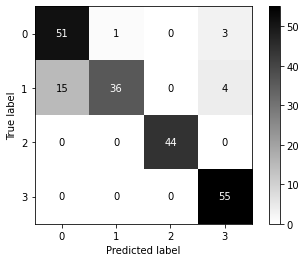

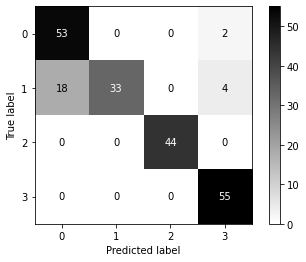

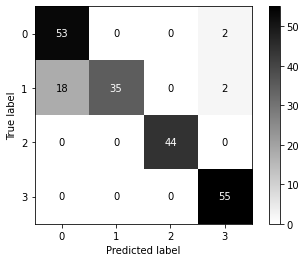

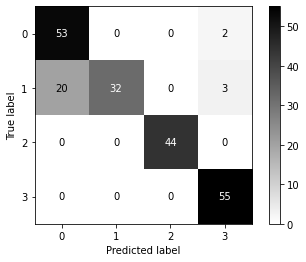

In [364]:
for i in range(1, 8, 2):

    klasy = [1, 33, 6, 3]
    featury = [10, 15, 4, 6]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.9043062200956937
Balanced accuracy: 0.9090909090909091
F1 score: 0.9043062200956937
Accuracy: 0.8947368421052632
Balanced accuracy: 0.9
F1 score: 0.8947368421052632
Accuracy: 0.8947368421052632
Balanced accuracy: 0.9
F1 score: 0.8947368421052632
Accuracy: 0.8947368421052632
Balanced accuracy: 0.9
F1 score: 0.8947368421052632


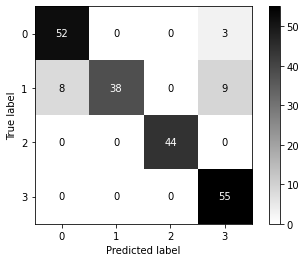

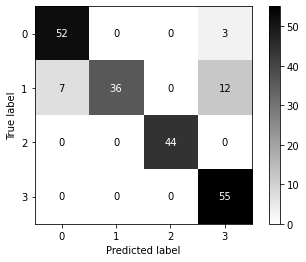

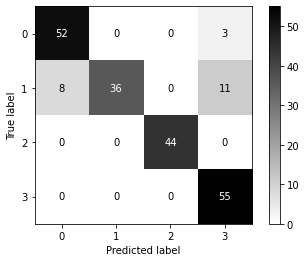

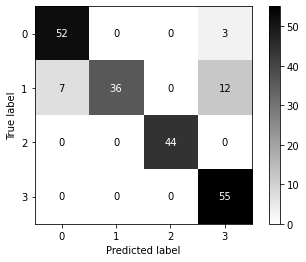

In [365]:
for i in range(1, 8, 2):

    klasy = [1, 33, 6, 3]
    featury = [10, 15, 4, 6, 8, 11, 12, 13]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.44755244755244755
Balanced accuracy: 0.509280303030303
F1 score: 0.44755244755244755
Accuracy: 0.4522144522144522
Balanced accuracy: 0.5134469696969697
F1 score: 0.4522144522144522
Accuracy: 0.44522144522144524
Balanced accuracy: 0.5053977272727272
F1 score: 0.44522144522144524
Accuracy: 0.4382284382284382
Balanced accuracy: 0.49801136363636367
F1 score: 0.4382284382284382


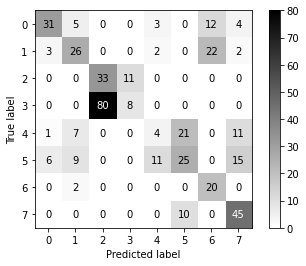

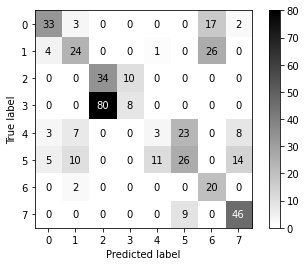

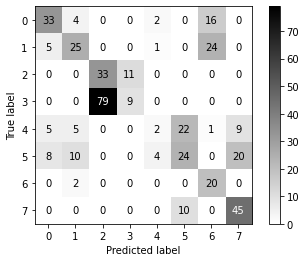

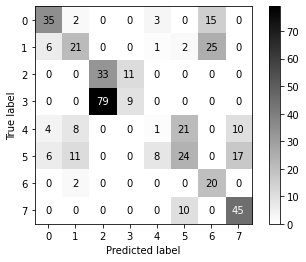

In [366]:
for i in range(1, 8, 2):

    klasy = [1, 33, 6, 3, 11, 13, 14, 29]
    featury = [10, 15]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.5757575757575758
Balanced accuracy: 0.6191287878787879
F1 score: 0.5757575757575758
Accuracy: 0.5944055944055944
Balanced accuracy: 0.6390151515151514
F1 score: 0.5944055944055944
Accuracy: 0.6060606060606061
Balanced accuracy: 0.655871212121212
F1 score: 0.6060606060606061
Accuracy: 0.5967365967365967
Balanced accuracy: 0.6446022727272728
F1 score: 0.5967365967365967


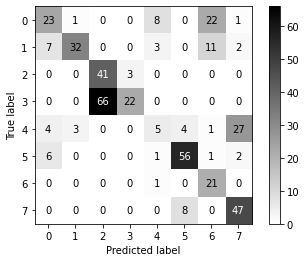

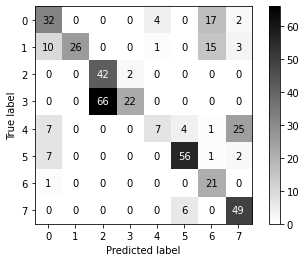

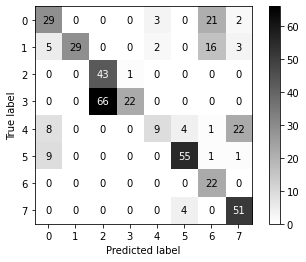

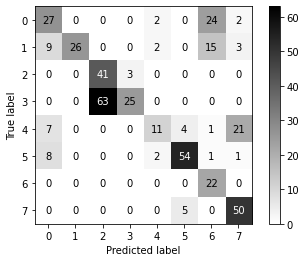

In [367]:
for i in range(1, 8, 2):

    klasy = [1, 33, 6, 3, 11, 13, 14, 29]
    featury = [10, 15, 4, 6]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

Accuracy: 0.7272727272727273
Balanced accuracy: 0.7532196969696969
F1 score: 0.7272727272727273
Accuracy: 0.7389277389277389
Balanced accuracy: 0.7621212121212122
F1 score: 0.738927738927739
Accuracy: 0.7738927738927739
Balanced accuracy: 0.7914772727272728
F1 score: 0.7738927738927739
Accuracy: 0.7599067599067599
Balanced accuracy: 0.7817234848484849
F1 score: 0.7599067599067599


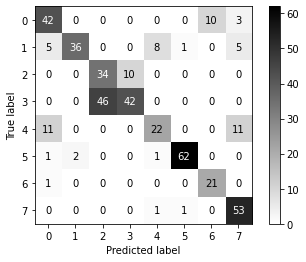

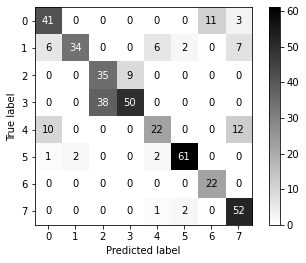

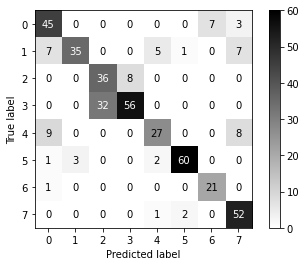

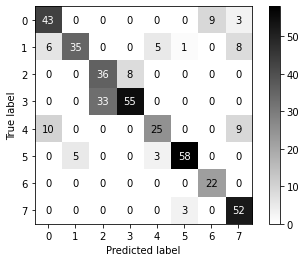

In [368]:
for i in range(1, 8, 2):

    klasy = [1, 33, 6, 3, 11, 13, 14, 29]
    featury = [10, 15, 4, 6, 8, 11, 12, 13]
    k = i

    bas, f1s = evaluate_model(klasy, featury, k)
    name = 'Classes = ' + str(len(klasy)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

    models.append((bas, f1s, k, name))

# Porownanie parametrow

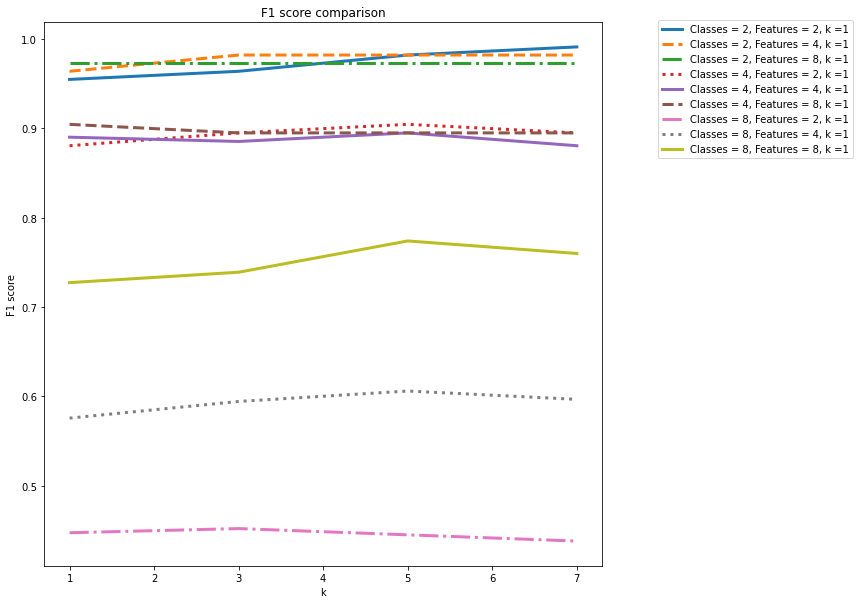

In [384]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

bases = []
f1ones = []
ks = []
name = []

plt.figure(figsize=(10, 10))
plt.title('F1 score comparison')
plt.ylabel('F1 score')
plt.xlabel('k')

for idx, model in enumerate(models, start=1):
    # bases.append(model[0])
    f1ones.append(model[1])
    ks.append(model[2])
    name.append(model[3])

    if idx % 4 == 0:
        plt.plot(ks, f1ones, label=name[0], lw=3, linestyle=next(linecycler))
        bases = []
        f1ones = []
        ks = []
        name = []

plt.legend(loc=(1.1,0.75))
plt.show()

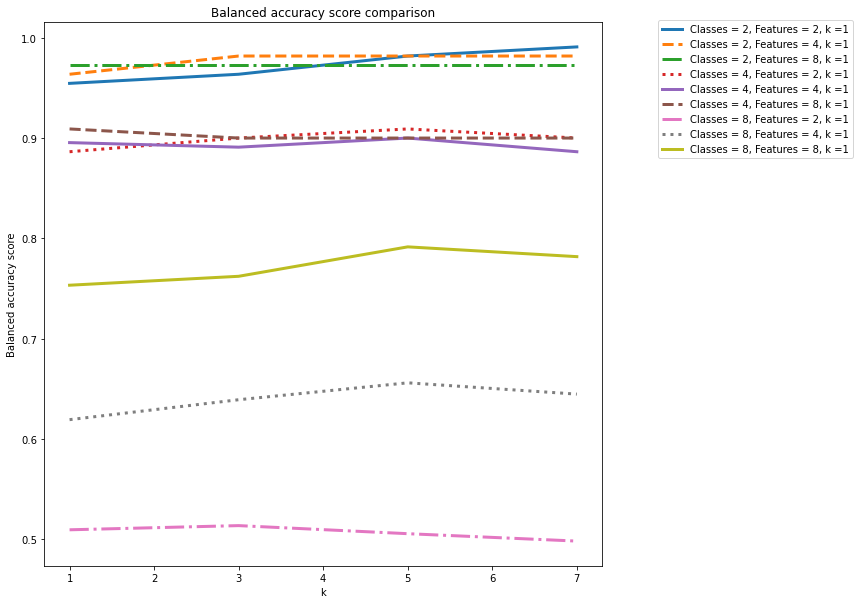

In [385]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

bases = []
f1ones = []
ks = []
name = []

plt.figure(figsize=(10, 10))
plt.title('Balanced accuracy score comparison')
plt.ylabel('Balanced accuracy score')
plt.xlabel('k')

for idx, model in enumerate(models, start=1):
    bases.append(model[0])
    # f1ones.append(model[1])
    ks.append(model[2])
    name.append(model[3])

    if idx % 4 == 0:
        plt.plot(ks, bases, label=name[0], lw=3, linestyle=next(linecycler))
        bases = []
        f1ones = []
        ks = []
        name = []

plt.legend(loc=(1.1,0.75))
plt.show()

# Wnioski

F1 score obliczany jest na podstawie czulosci i specyficznosci. Bazuje on na sredniej harmonicznej

![image](https://miro.medium.com/max/782/1*5V5OEP51o26FzwuEgqHojw.png)

Balanced accuracy score jest obliczany na podstawie czulosci i specyficznosci.

![image](https://miro.medium.com/max/1400/1*sfBGtDUo3n9OGlZr14O-Og.png)

Dla obu metryk doskonala klasyfikacja to 1 a wartosc 0.5 to klasyfikacja losowa

## k-NN i NN

Roznica pomiedzy tymi klasyfikatorami to sposob w jaki dokonuja klasyfikacji. W NN klasyfikacji dokonujemy na podstawie jednego najblizszego sasiada, natomiast w k-NN na podstawie k tych sasiadow. Dzieki sprawdzeniu wielu sasiadow, metoda k-NN jest mniej podatna na zle dane.

## -

W zrealizowanym zadaniu duzy wplyw na wyniki klasyfikacji mial wybor cech ktore bedzie uzywal model